# Introduction

This notebook demonstrates the implementation of decision tree-based models for predicting student outcomes. We will explore two different models: a Bagging Classifier with Decision Trees and an AdaBoost Classifier with Decision Trees. Each model will be evaluated based on its performance metrics and feature importance.

## First decision Tree

The first decision tree uses Bagging (Bootstrap Aggregating). Bagging is an ensemble method that improves the stability and accuracy of machine learning algorithms. In this notebook, we use a Bagging Classifier with Decision Trees as the base estimator. The Bagging Classifier trains multiple Decision Trees on different subsets of the data and combines their predictions to reduce variance and prevent overfitting.

This tree is also vizualised, the same vizualisation can be added to the other trees if wanted.



Best Parameters: {'estimator__max_depth': 15, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'n_estimators': 50}
Cross-validation scores: [0.73387097 0.79483037 0.7819063  0.76736672 0.78029079]
Mean cross-validation score: 0.7716530303819896
Accuracy (Train): 0.99
Accuracy (Test): 0.76
Precision: 0.75
Recall: 0.76
F1 Score: 0.75
Confusion Matrix:
[[333  63  45]
 [ 24 584  34]
 [ 54  96  95]]
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.78       441
    Graduate       0.79      0.91      0.84       642
    Enrolled       0.55      0.39      0.45       245

    accuracy                           0.76      1328
   macro avg       0.71      0.68      0.69      1328
weighted avg       0.75      0.76      0.75      1328



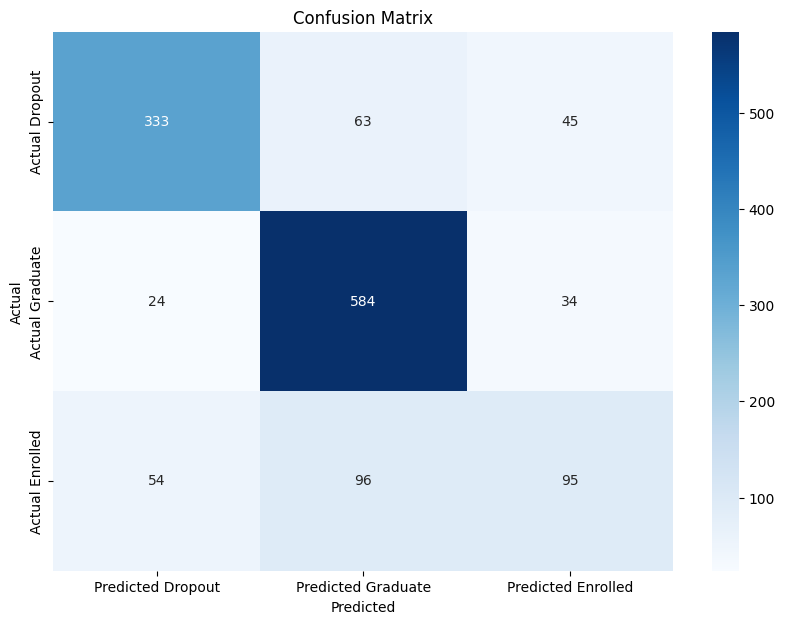

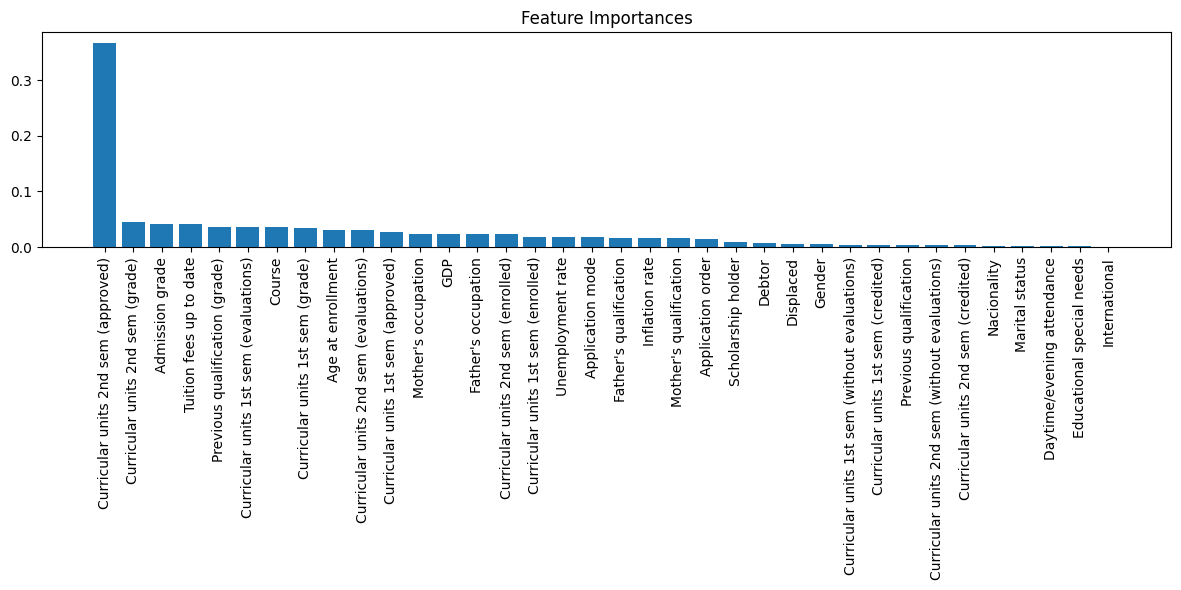


Updated features list:
['Application mode', 'Application order', 'Course', 'Previous qualification', 'Previous qualification (grade)', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


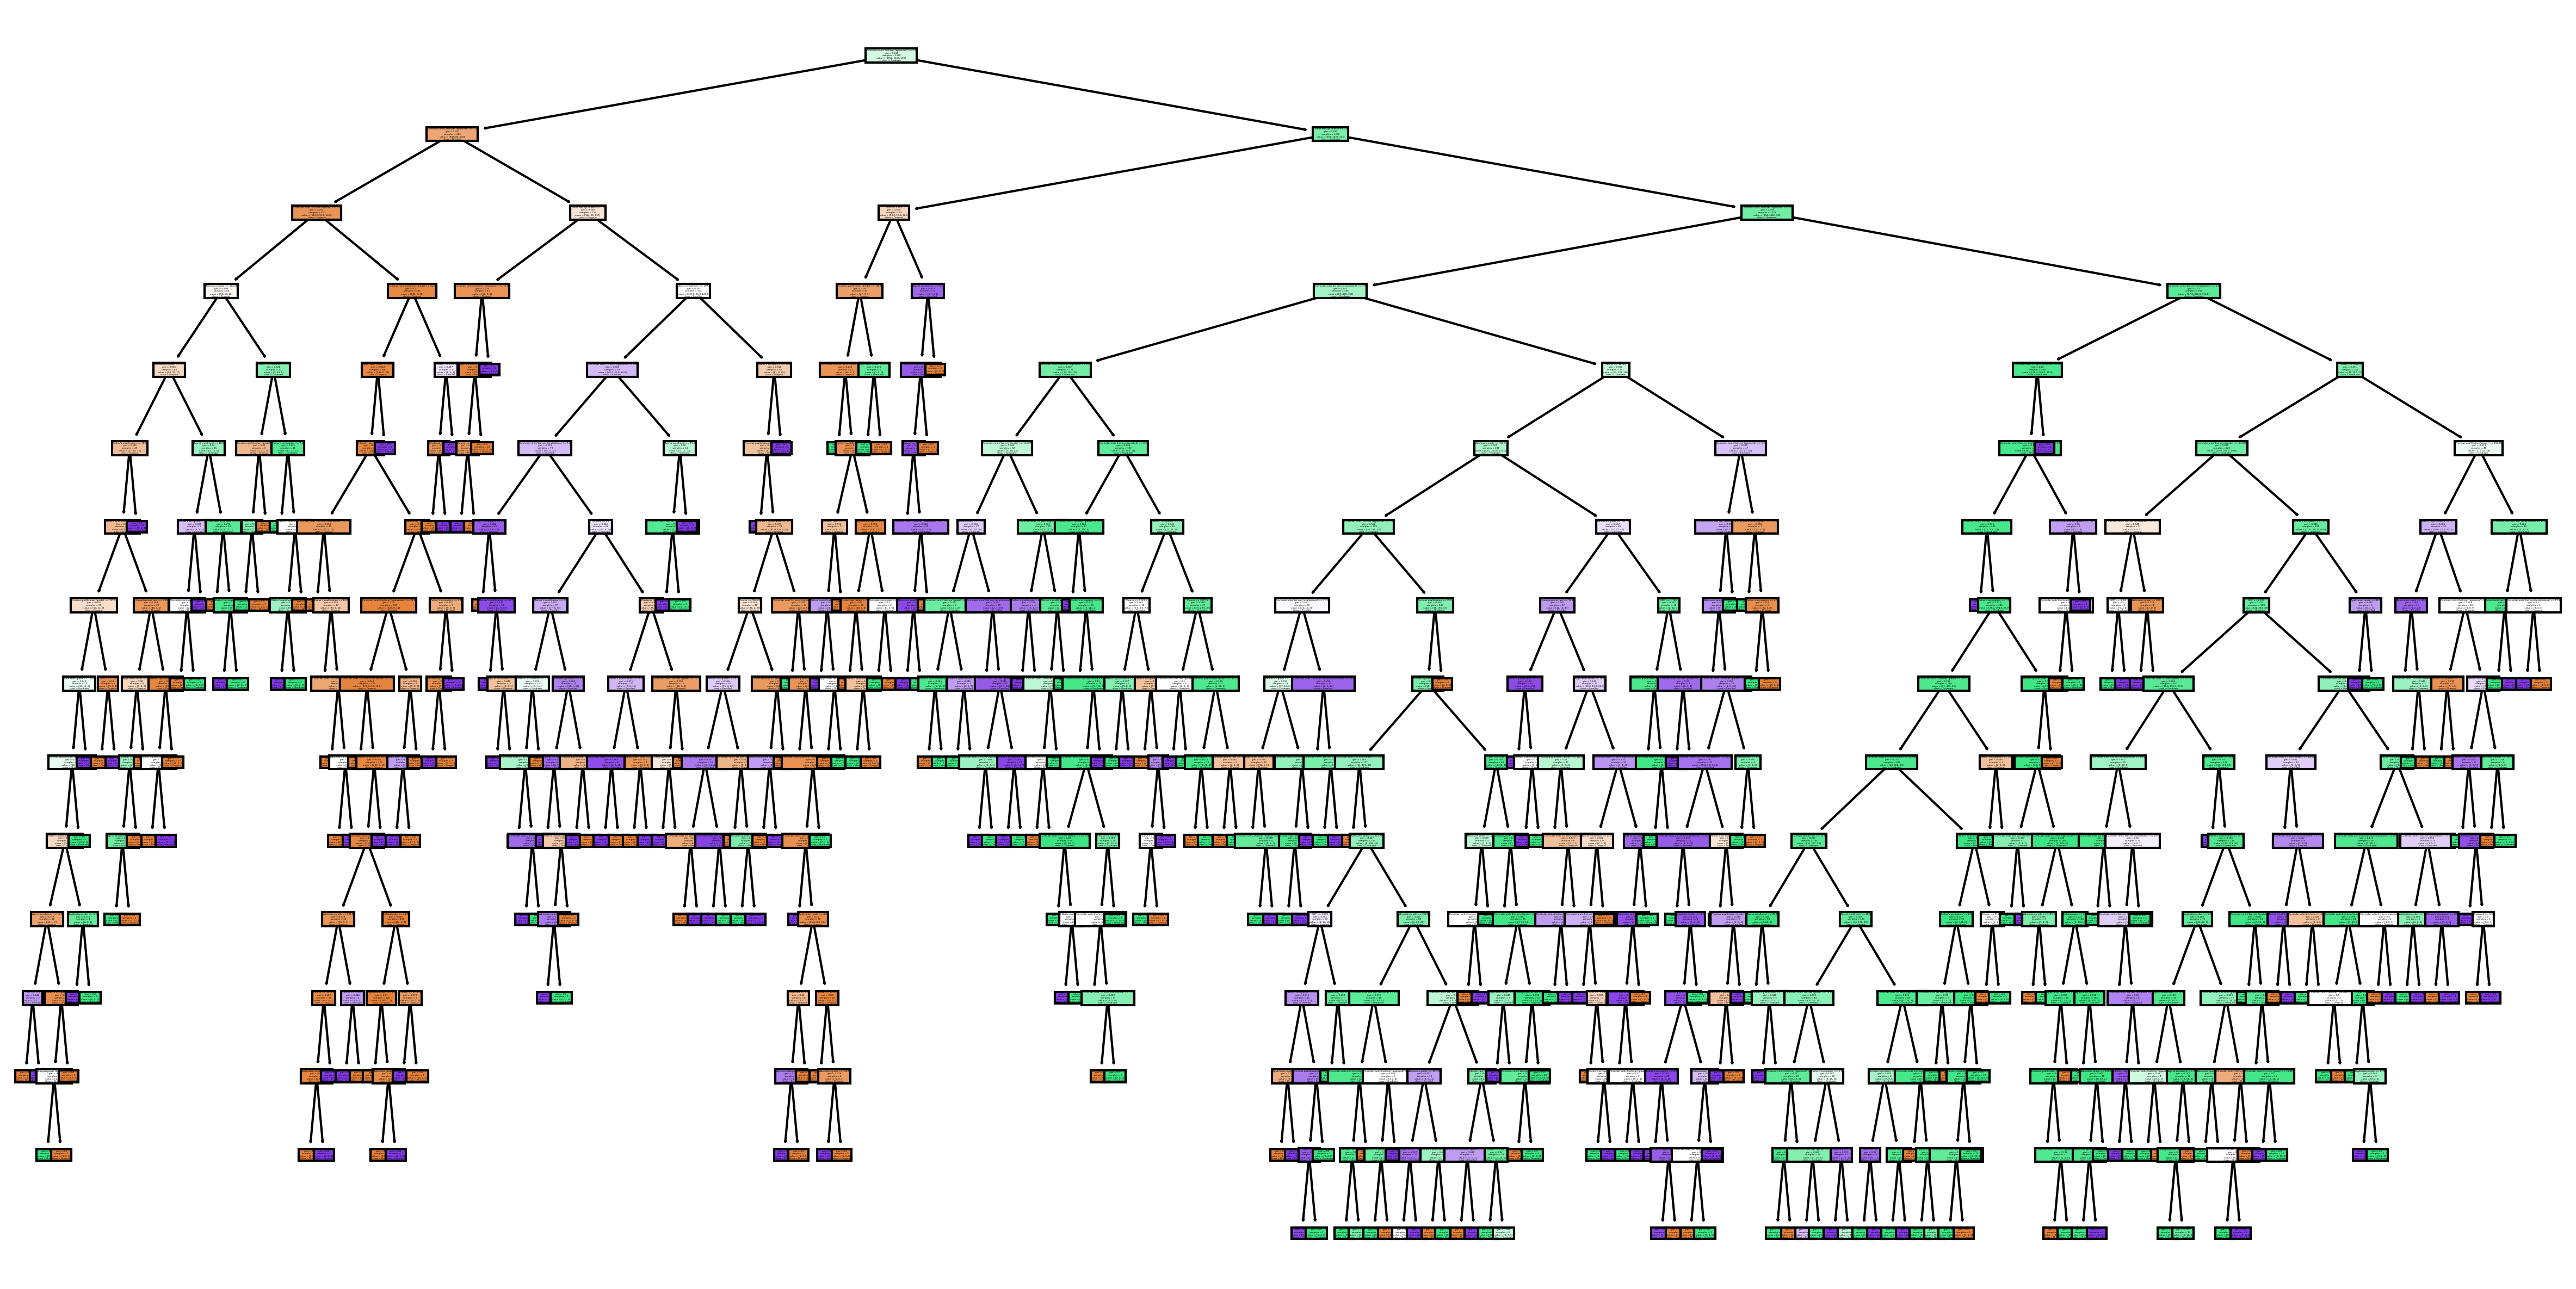

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
data = pd.read_csv('data.csv', delimiter=';')

# Select relevant features and target
features = [
    'Marital status', 'Application mode', 'Application order', 'Course', "Daytime/evening attendance",
    'Previous qualification', 'Previous qualification (grade)',
    'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
target = 'Target'

# Preprocess the data
X = data[features].copy()
y = data[target].copy()

# Encode target (assuming "Graduate" = 1, "Dropout" = 0, "Enrolled" = 2)
y = y.map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Define the Bagging classifier
bagging_clf = BaggingClassifier(estimator=base_estimator, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [25, 50, 100],
    'estimator__max_depth': [5, 10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the Bagging model with best parameters
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=best_params['estimator__max_depth'],
        min_samples_split=best_params['estimator__min_samples_split'],
        min_samples_leaf=best_params['estimator__min_samples_leaf'],
        random_state=42
    ),
    n_estimators=best_params['n_estimators'],
    random_state=42
)
bagging_clf.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(bagging_clf, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Make predictions
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f'Accuracy (Train): {accuracy_train:.2f}')
print(f'Accuracy (Test): {accuracy_test:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred_test, target_names=['Dropout', 'Graduate', 'Enrolled']))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Dropout', 'Predicted Graduate', 'Predicted Enrolled'], yticklabels=['Actual Dropout', 'Actual Graduate', 'Actual Enrolled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_clf.estimators_], axis=0)
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Save the model
joblib.dump(bagging_clf, 'bagging_model.pkl')

# Code to use if we want to remove the lowest importance features from the list, e.g. the 5 lowest importance features
num_lowest_features = 5
lowest_features = [features[i] for i in indices[-num_lowest_features:]]
updated_features = [feature for feature in features if feature not in lowest_features]

print("\nUpdated features list:")
print(updated_features)

plt.figure(figsize=(20,10), dpi=300)  # Increase DPI for better quality
plot_tree(bagging_clf.estimators_[0], feature_names=X.columns, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True)
plt.show()

## Second Decision Tree

This is the same as the first decision tree, except that it does not use the Curriculum data. This allows us to use this decision tree to make better estimates for people that have not started their studies and therefore dont have Curriculum data to input

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
data = pd.read_csv('data.csv', delimiter=';')

# Select relevant features and target
features = [
    'Marital status', 'Application mode', 'Application order', 'Course', "Daytime/evening attendance",
    'Previous qualification', 'Previous qualification (grade)',
    'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
target = 'Target'

# Preprocess the data
X = data[features].copy()
y = data[target].copy()

# Encode target (assuming "Graduate" = 1, "Dropout" = 0, "Enrolled" = 2)
y = y.map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Define the Bagging classifier
bagging_clf = BaggingClassifier(estimator=base_estimator, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [25, 50, 100],
    'estimator__max_depth': [5, 10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the Bagging model with best parameters
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=best_params['estimator__max_depth'],
        min_samples_split=best_params['estimator__min_samples_split'],
        min_samples_leaf=best_params['estimator__min_samples_leaf'],
        random_state=42
    ),
    n_estimators=best_params['n_estimators'],
    random_state=42
)
bagging_clf.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(bagging_clf, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Make predictions
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f'Accuracy (Train): {accuracy_train:.2f}')
print(f'Accuracy (Test): {accuracy_test:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred_test, target_names=['Dropout', 'Graduate', 'Enrolled']))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Dropout', 'Predicted Graduate', 'Predicted Enrolled'], yticklabels=['Actual Dropout', 'Actual Graduate', 'Actual Enrolled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_clf.estimators_], axis=0)
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Save the model
joblib.dump(bagging_clf, 'bagging_model_without_curriculum.pkl')

# Code to use if we want to remove the lowest importance features from the list, e.g. the 5 lowest importance features
num_lowest_features = 5
lowest_features = [features[i] for i in indices[-num_lowest_features:]]
updated_features = [feature for feature in features if feature not in lowest_features]

print("\nUpdated features list:")
print(updated_features)

## Third Decision Tree

The third decision tree uses Adaptive Boosting with AdaBoost. AdaBoost is another ensemble method that combines multiple weak classifiers to create a strong classifier. In this notebook, we use an AdaBoost Classifier with Decision Trees as the base estimator. AdaBoost assigns weights to each training sample and iteratively adjusts these weights to focus on the misclassified samples, thereby improving the overall model performance.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
data = pd.read_csv('data.csv', delimiter=';')

# Select relevant features and target
features = [
    'Marital status', 'Application mode', 'Application order', 'Course', "Daytime/evening attendance",
    'Previous qualification', 'Previous qualification (grade)',
    'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
target = 'Target'

# Preprocess the data
X = data[features].copy()
y = data[target].copy()

# Encode target (assuming "Graduate" = 1, "Dropout" = 0, "Enrolled" = 2)
y = y.map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoost classifier
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the AdaBoost model with best parameters
ada_clf = AdaBoostClassifier(estimator=base_estimator, **best_params, random_state=42)
ada_clf.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(ada_clf, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Make predictions
y_pred_train = ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f'Accuracy (Train): {accuracy_train:.2f}')
print(f'Accuracy (Test): {accuracy_test:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred_test, target_names=['Dropout', 'Graduate', 'Enrolled']))

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Dropout', 'Predicted Graduate', 'Predicted Enrolled'], yticklabels=['Actual Dropout', 'Actual Graduate', 'Actual Enrolled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importances = ada_clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Save the model
joblib.dump(ada_clf, 'ada_boost_model.pkl')

# Identify the lowest importance features (e.g., bottom 5 features)
num_lowest_features = 12
lowest_features = [features[i] for i in indices[-num_lowest_features:]]

# Remove the lowest importance features from the list
updated_features = [feature for feature in features if feature not in lowest_features]

print("\nUpdated features list:")
print(updated_features)